# Introduction to Neural Networks using PyTorch 

## Background:

In deep learning, neural networks are modelled to allow us to compute data much in the way that a human brain does. In a neural network, neurons are artificial, sometimes referred to as perceptrons. A neuron forms the most basal and fundamental unit of a neural network, and comprises three components: 
1. A collection of inputs. 
2. A number of weights.
3. An activation function. 

Through applying a series of weights, biases and an activation function, a neuron can translate a number of potential inputs into a single output. 

A neural network is where the outputs of one layer of neurons triggers another layer of neurons, which in turn processes the outputs of the previous layer(s) as inputs, with subsequent outputs of their own. These layers are often constructed into an input layer, a series of hidden layers (dependent on the complexity of the neural network) and an output layer, that conveys the final output of the network. 

In this lesson, we are going to use PyTorch to compute input data and explore the basics of deep learning. We will start with a single neuron, and move up to an MLP (multi-layer pereceptron), capable of computing and predicting outputs from input data in a more complex and efficient manner, iteratively learning and improving its predictions.

In [5]:
!pip install torch torchvision matplotlib -q

Let's begin by importing the required PyTorch modules, together with Numpy and Matplotlib.pyplot.

In [6]:
import torch # this is the PyTorch module
import torch.nn as nn # this is the neural network module
import torch.nn.functional as F # this is the functional module
import torch.optim as optim # this is the optimizer module
import torchvision # this is the vision module

import warnings
warnings.filterwarnings("ignore") # this is to ignore warnings

# Import the MNIST dataset
from torchvision import datasets, transforms

# Import the matplotlib module
import matplotlib.pyplot as plt

# Import the numpy module
import numpy as np



 ### What is a neuron?

Artifical neurons are mathematical models that compute the weighted average across multiple inputs, to which a bias is applied. The result is then passed through an activation function that produces the neuron's output. An activation function is a nonlinear function, accepting a linear input, and giving a nonlinear output. 
 
For example, a neuron can be defined by the following equation: 
 
 $o = \tanh{(w.x+b)}$

This explains that the input is a vector $x$ which is fixed, whereas the weights $w$ and the bias $b$ are parameters that can be adjusted to improve the performance of the neuron.

In the code cell below, we will define three different activation functions: a sigmoid function, ReLU and tanh. We can then use a for loop in order to loop over the defined activation functions, and plot these as individual graphs, in order to visualise them.

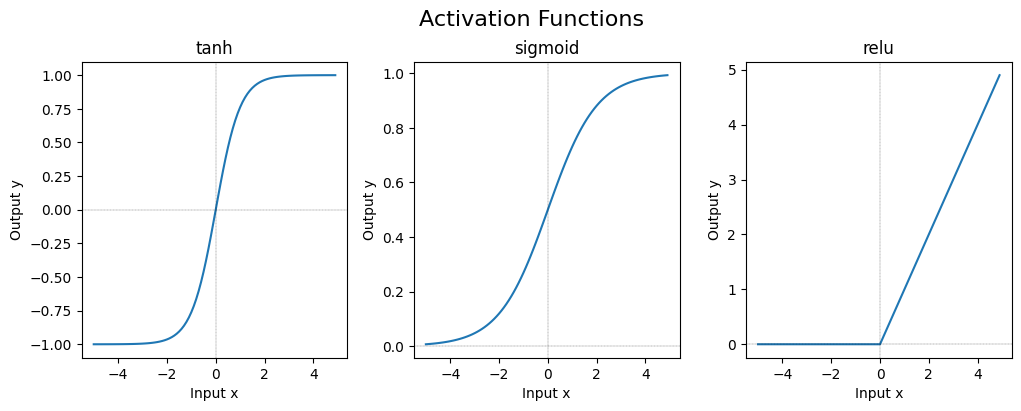

In [7]:

# There are multiple activation functions that can be used for a neuron. 
# Instead of just tanh, we can also use sigmoid, ReLU, among others.

def sigmoid(x):
    return 1/(1 + np.exp(-x))
def relu(x):
    return np.maximum(0,x)


# Define the sigmoid, ReLU, and tanh activation functions:
activation_functions = [np.tanh, sigmoid, relu]

# Plot the activation functions as separate plots:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define the input values as a range with Numpy's arange function. The values are given as start, stop and step:
x = np.arange(-5, 5, 0.1)

# Loop over the activation functions:
for i, ax in enumerate(axes.flat):
    y = activation_functions[i](x)
    ax.plot(x, y)
    ax.set_title(f'{activation_functions[i].__name__}')
    ax.axhline(y=0, color='k', linestyle='--', lw=0.2)
    ax.axvline(x=0, color='k', linestyle='--', lw=0.2)
    ax.set(xlabel='Input x', ylabel='Output y')

# Make a sup title:
fig.suptitle('Activation Functions', fontsize=16)

# Insert a gap between the suptitle and the three plots:
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(wspace=0.25)
plt.show()


These graphs clearly display the relationship represented by each activation function. 

Next, we need to define a neuron as an input value, weight and bias, with applied activation function, and by calculating the dot product of the inputs and weights using Numpy, and applying an activation function to this.

In [8]:
# using numpy, define a function that serves the role of an individual neuron:
def neuron(x, w, b, activation_function=np.tanh):
    # calculate the dot product of the inputs and the weights
    z = np.dot(x, w) + b
    # apply the activation function
    a = activation_function(z)
    return a

Now that we have defined the function of a single neuron, we can experiment with different weights, to observe their effect on the neuron's output. 

In order to clearly visualise this, we will not specify a bias at this stage. Using a ```for``` loop, we can specify a specific range of input weights to display, and use the legend function within matplotlib to display a legend denoting each one.

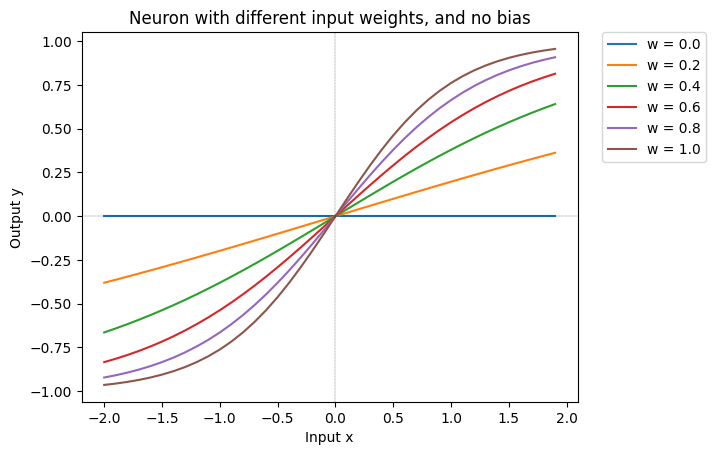

In [9]:
# To see the effect of different weights for a given input, we can plot the output of the neuron for different weights.
# Create a numpy array, and specify vlaues from 
for i in np.arange(-0,1.1,0.2):
    x = np.arange(-2, 2, 0.1)
    y = neuron(x, w=i, b=0)
    plt.plot(x, y, label=f'w = {i.round(2)}')

    # Within matplotlib.pyplot, we can specify a legend, its position and x- and y-axis labels, as follows:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Input x')
    plt.ylabel('Output y')
    
# Specify dotted lines at x=0 and y=0. 
plt.axhline(y=0, color='k', linestyle='--', lw=0.2)
plt.axvline(x=0, color='k', linestyle='--', lw=0.2)

plt.title('Neuron with different input weights, and no bias')

plt.show()

Next, we can introduce biases. To visualise the effect that a range of biases will have, we can specify an input weight of 1, and apply a range of biases, and plot these using a ```for``` loop - as we did, above.

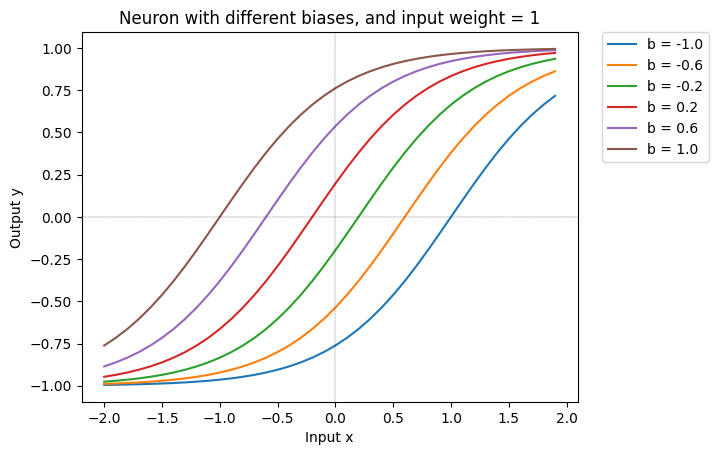

In [10]:
# To see the effect of different biases for a given input, we can plot the output of the neuron for different biases.

for i in np.arange(-1,1.1,0.4):
    x = np.arange(-2, 2, 0.1)
    y = neuron(x, 1, b=i)

    plt.plot(x, y, label=f'b = {i.round(2)}')

    # Within matplotlib.pyplot, we can specify a legend, its position and x- and y-axis labels, as follows:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Input x')
    plt.ylabel('Output y')
    
# Specify dotted lines at x=0 and y=0.
plt.axhline(y=0, color='k', linestyle='--', lw=0.2)
plt.axvline(x=0, color='k', linestyle='--', lw=0.2)

plt.title('Neuron with different biases, and input weight = 1')

plt.show()

### Computing gradients using PyTorch

**Let us see how gradients in PyTorch work for simple functions:**

 - Take $y = 2x^3 + x + 1$ and $x = 2$. Compute $\frac{\partial y}{\partial x}$ by hand and confirm using the result from PyTorch.

In [11]:
# define a tensor for x, and set requires_grad to True:
x = torch.tensor(data=2.0, requires_grad=True)

# define the function y; the double asterisk denotes 'to the power of'.
y = 2*x**3 + x + 1

# calculate the gradient of y with respect to x:
y.backward()

# Assign the gradient (delta y over delta x) to a variable, and print:
dy_dx = x.grad
print(f'dy/dx for x = 2: {dy_dx}')

dy/dx for x = 2: 25.0


### We can define a whole range of x values, and calculate the gradient of y with respect to x for each value of x.

Assign your range of x values to a variable, and loop through this with a for loop to compute individual gradients of y respective to each x value.

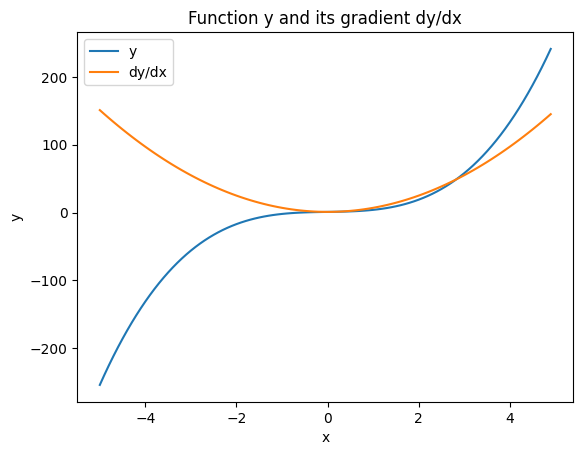

In [12]:

# Plot the function y and the gradient dy/dx at a range of values for x, using Numpy's arange function.
x_range = np.arange(-5, 5, 0.1)

# Calculate the gradient of y with respect to x using PyTorch iteratively over the range of values for x:

#Begin by creating two empty lists:
dy_dx_torch = []
y_list = []

#Populate these with the following for loop: 
for i in x_range:
    x = torch.tensor(i, requires_grad = True)
    y = 2*x**3 + x + 1
    y.backward()
    dy_dx_torch.append(x.grad)
    y_list.append(y.item())

# Convert these lists into numpy arrays:
dy_dx_torch = np.array(dy_dx_torch)
y = np.array(y_list)

# Plot the function y and the gradient dy/dx at a range of values for x:
plt.plot(x_range, y, label='y')
plt.plot(x_range, dy_dx_torch, label='dy/dx')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function y and its gradient dy/dx')
plt.show()

Taking the same procedure executed in the previous two cells, let's apply this to a more complex function: that of the neuron, itself.

In [13]:
# We can define the same neuron function as before, but this time using PyTorch instead of Numpy:

def neuron_in_pytorch(x, w, b, activation_function=torch.tanh):
    # Calculate the dot product of the inputs and the weights:
    z = torch.dot(x, w) + b
    # Apply the activation function to the dot prdouct:
    a = activation_function(z)
    return a

# Define a tensor for x, make it a vector, and set requires_grad to True:
x = torch.tensor([0.2, 0.3], requires_grad=True)

# Define the weights and bias:
w = torch.tensor([1.0, 0.4])
b = torch.tensor(1.0)

# Define the function y:
y = neuron_in_pytorch(x, w, b)

# Calculate the gradient of y with respect to x:
y.backward()

# Assign the gradient (delta y over delta x) to a variable, and print:
dy_dx = x.grad

print(f'dy/dx for x = [0.2, 0.3]: {dy_dx}')

dy/dx for x = [0.2, 0.3]: tensor([0.2487, 0.0995])


### Now we can show a simple example of how gradient descent works.

Gradient descent, is an optimisation algorithm that is often used in training neural networks, and machine learning models. The purpose here is to find the minimum of a function, which we can do by iteratively updating the input value $x$, using the gradient descent algorithm. When we use gradient descent in deep learning, we are trying to find the minimum of a ***loss function***, which is a function of the weights and biases of the neural network.

- The loss function is defined as: the **difference between the output of the neural network and the target value**. 

In deep learning, we are trying to find the weights and biases that *minimize the difference between the output of the neural network and the target value*.

We can use a gradient descent algorithm to update the values of (learnable) weights and biases in an attempt to optimise a neural network. This is done by taking the derivative of the loss function with respect to the weights and biases, and then updating the weights and **biases by subtracting the derivative from the current value**. This is done for each weight and bias in the network. The process by which this is done is called ***backpropagation***.


- The reason that backpropagation is required, is that we need to calculate the gradient of the loss function with respect to the weights and biases of the neural network, so that we can update the weights and biases using gradient descent.

### Let's begin by defining the function $y$:
$y = x^2$ 

We know the minimum of this function is at $x$ = 0: 

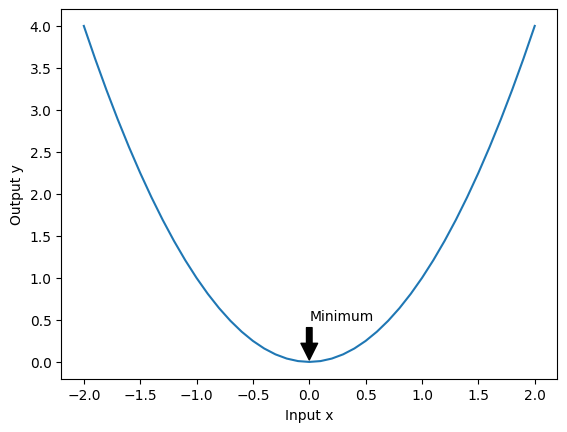

In [14]:
# Plot a x^2 function:
x = np.arange(-2, 2.1, 0.1)
y = x**2
plt.plot(x, y)
plt.xlabel('Input x')
plt.ylabel('Output y')
# Using matplotlib.pyplot's annotate function, label the minimum with a black arrow, and text label, as follows:
plt.annotate('Minimum', xy=(0, 0), xytext=(0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

We can then define a function for the *gradient descent* using $x$, a specified learning rate (a step size for the gradient descent), and a given number of iterations.

x at iteration 0: 16.0
x at iteration 1: 12.800000190734863
x at iteration 2: 10.239999771118164
x at iteration 3: 8.191999435424805
x at iteration 4: 6.5535993576049805
x at iteration 5: 5.242879390716553
x at iteration 6: 4.194303512573242
x at iteration 7: 3.355442762374878
x at iteration 8: 2.684354305267334
x at iteration 9: 2.1474833488464355
x at iteration 10: 1.7179867029190063
x at iteration 11: 1.374389410018921
x at iteration 12: 1.0995115041732788
x at iteration 13: 0.879609227180481
x at iteration 14: 0.7036873698234558
x at iteration 15: 0.5629498958587646
x at iteration 16: 0.45035991072654724
x at iteration 17: 0.36028793454170227
x at iteration 18: 0.28823035955429077
x at iteration 19: 0.2305842936038971
x at iteration 20: 0.18446743488311768
x at iteration 21: 0.14757394790649414
x at iteration 22: 0.11805915832519531
x at iteration 23: 0.09444732964038849
x at iteration 24: 0.07555786520242691


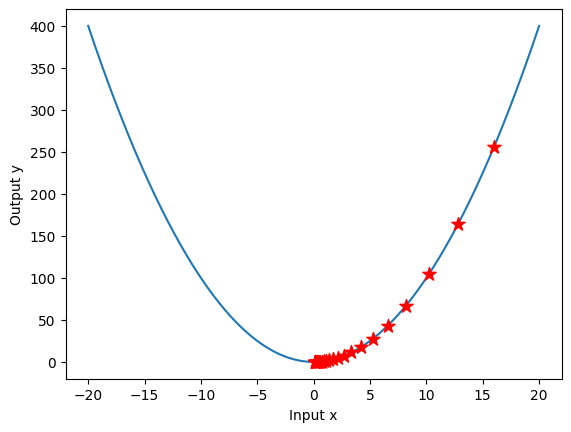

In [15]:

# Write a function that starts with a random value for x, and then iteratively updates x using the gradient descent algorithm:
def gradient_descent(x, learning_rate=0.1, n_iterations=100):

    learning_rate = torch.tensor(0.1)
    x_list = []
    for i in range(n_iterations):
        # Define the function y:
        y = x**2
        # Calculate the gradient of y with respect to x:
        y.backward()
                
        with torch.no_grad():
            # Update x; here -= subtracts learning rate * x.grad from x, and assigns the result to the variable x.
            x -= learning_rate * x.grad
            # Print the updated value of x:
            print(f'x at iteration {i}: {x}')
            # Append the updated value of x to the list:
            x_list.append(x.item())
            # Set the gradient to zero, otherwise it will accumulate:
            x.grad.zero_()  
    return x, x_list

# Define a tensor for x, make it a scalar, and set requires_grad to True:
x = torch.tensor(20.0, requires_grad = True)

# Call the gradient_descent function:
x, x_list = gradient_descent(x, learning_rate=0.1, n_iterations=25)

# Plot the function y = x^2:
x = np.arange(-20, 20.1, 0.1)
y = x**2
plt.plot(x, y)

# Plot the values of x that were updated during gradient descent, make each point a red star and overlay it onto
# the function y = x^2:
plt.scatter(x_list, [i**2 for i in x_list], color='red', marker='*', s=100, zorder=10)
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.show()


## Example of a simple single-layer neural network:

- A layer of neurons differs from a single neuron, but the same principles apply. We can define a layer of neurons as:

$y = \tanh{(W.x + b)}$

Where $W$ is a matrix of weights, $b$ is a vector of biases, and $x$ is a vector of inputs.

- As explained above, these weights and biases are updated through gradient descent. 

## AND Gate Example:

Let's start by creating a layer of neurons that can learn the truth table for an AND gate. An AND gate is a logic gate that outputs 1 if both inputs are 1, and 0 otherwise. Such a neural network unit that can compute predictions from input data, is termed a **perceptron**.

The truth table for an AND gate is:

| first input (x1) | second input (x2) | output (y) |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

The x1 and x2 columns will be the inputs to the layer of neurons, and the y column will be the output. We can represent this as a matrix:

$X = \begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$
$y = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$



In [16]:
x_train = np.array(
    [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]], dtype=np.float32)

y_train = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Convert the numpy arrays to PyTorch tensors:
x_train = torch.from_numpy(x_train) 
y_train = torch.from_numpy(y_train)

# The number of epochs is the number of times the training data is passed through the single-layer neural network:
epochs = 5000

# The learning rate is the step size for the gradient descent:
learning_rate = 0.1

# Number of features - 2 in this case
input_size = len(x_train[0])

# Number of outputs - 1 in this case (on/off)
output_size = 1

losses = []
w = torch.randn(input_size, output_size, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

for e in range(epochs):

    # Calculate the output of the neuron:
    y_pred = torch.matmul(x_train, w) + b

    # Apply a sigmoid activation function to the output of the neuron:
    y_pred = torch.sigmoid(y_pred)

    # Calculate the loss:
    loss = (y_pred - y_train).pow(2).sum() # MSE loss

    # Print the loss every 500 epochs
    if e % 500 == 0:
        print(f'Epoch: {e} | loss: {loss.item():.4f}')
    losses.append(loss.item())

    # Calculate the gradients of the loss with respect to the weights and biases:
    loss.backward()

    # Update the weights and biases:
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Zero the gradients. Otherwise, they will accumulate:
        w.grad.zero_()
        b.grad.zero_()

Epoch: 0 | loss: 0.6967
Epoch: 500 | loss: 0.1142
Epoch: 1000 | loss: 0.0589
Epoch: 1500 | loss: 0.0385
Epoch: 2000 | loss: 0.0283
Epoch: 2500 | loss: 0.0222
Epoch: 3000 | loss: 0.0182
Epoch: 3500 | loss: 0.0154
Epoch: 4000 | loss: 0.0133
Epoch: 4500 | loss: 0.0117


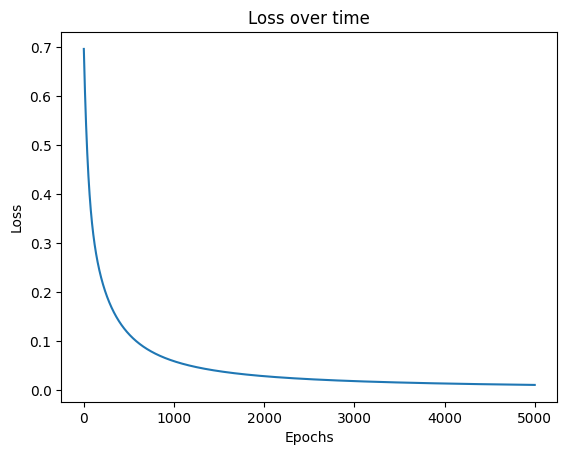

In [17]:
# Plot the loss over time:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over time')

plt.show()
# Ṭhis shows that the loss is decreasing over time, which means that the neural network is learning.

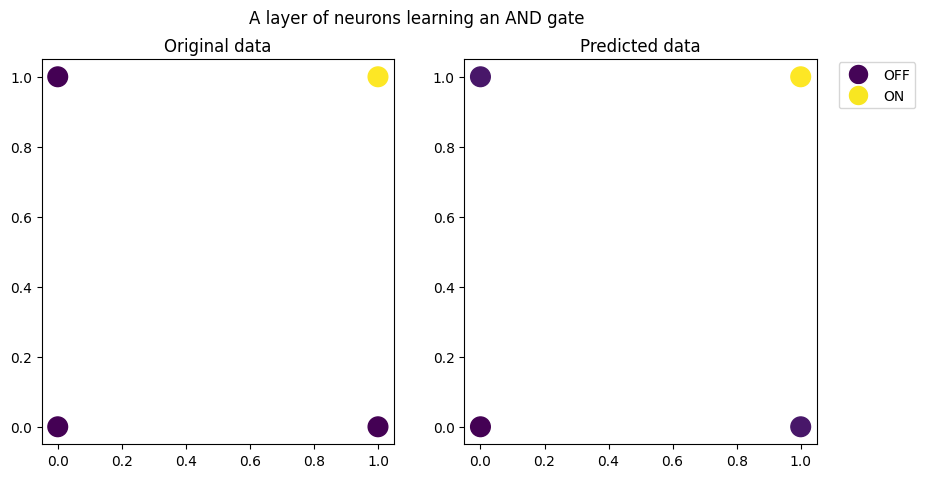

In [18]:
# Compare the real labels of the AND gate to the predicted labels from the perceptron:

# Make two subplots, side by side:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data:
ax1.scatter(x_train[:, 0], x_train[:,1], c=y_train.numpy(), s=200)

# Plot the predicted data:
ax2.scatter(x_train[:, 0], x_train[:,1], c=y_pred.detach().numpy(), s=200)

# Add a title to each subplot:
ax1.set_title('Original data')
ax2.set_title('Predicted data')

# Add a title to the figure:
fig.suptitle('A layer of neurons learning an AND gate')

# Make a manual legend:
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=0, vmax=1)
rgba_color_0 = cm.viridis(norm(0.01)) 
rgba_color_1 = cm.viridis(norm(.99)) 
line1 = Line2D([], [], color="white", marker='o', markerfacecolor=rgba_color_0, markersize=15)
line2 = Line2D([], [], color="white", marker='o', markerfacecolor=rgba_color_1, markersize=15)

plt.legend((line1, line2), ('OFF', 'ON'), numpoints=1, loc=1, bbox_to_anchor=(1.3, 1.01))
plt.show()

As can be seen in the plot, the perceptron that we trained using the x1 and x2 input data, successfully outputted predicted data that matched the labelled data (y).

## Multi-layer neural networks

Now that a single layer of neurons has been implemented, we can use PyTorch to implement multiple layers to classify the MNIST (Modified National Institute of Standards and Technology) dataset. MNIST is a vast dataset of handwritten characters that is often used to train machine learning algorithms in image analysis and detection.

- We don't have to write everything as explicitly as we did in the previous exercise. We can use the `nn` module in PyTorch to define the layers of the network, creating an MLP (Multi-Layer Pereceptron) to classify MNIST. The `nn` module has a `Sequential` class that allows us to define a network as a sequence of layers. We can also use the `nn` module to define the loss function and the optimizer. 

In [19]:
# Use the nn module to create an MLP to classify MNIST, with 3 layers:

# Import the nn module from PyTorch
import torch.nn as nn

# Define the MLP class:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # The forward pass is the sequence of operations 
        # that the input x goes through in the network. 
        # In this case, the input goes through 3 linear layers,
        # where a ReLU activation function is applied to the 
        # output of the first two layers, before the output is
        # passed through a softmax activation function:
        out = nn.Sequential(
            # flatten the image:
            nn.Flatten(),
            # apply the first linear layer:
            self.linear1,
            # apply the ReLU activation function:
            nn.ReLU(),
            # apply the second linear layer:
            self.linear2,
            # apply the ReLU activation function:
            nn.ReLU(),
            # apply the third linear layer:
            self.linear3,
            # apply the softmax activation function. 
            # This is necessary because the output 
            # of the network is a probability distribution, 
            # and we want the the most probable class to be 
            # 1 and the rest to be 0:
            nn.Softmax(dim=1)
        )(x)
        return out


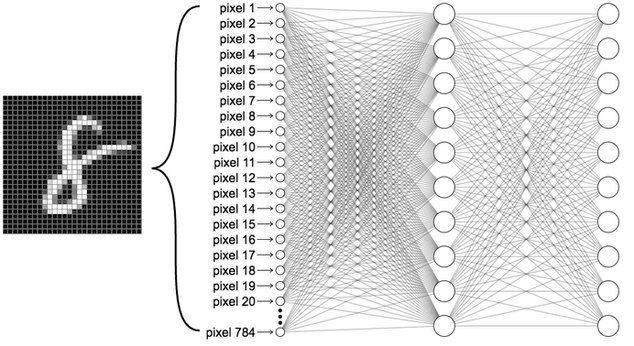

We are now ready to download the MNIST dataset. PyTorch has a built-in function that allows us to download this data, and to load it into a data loader. This is a convenient way to load the data in batches, and apply transformations to it. We will use the data loader to load the data into batches of **64 images**, and to normalise these.

100%|██████████| 9912422/9912422 [00:00<00:00, 185114968.54it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 82573751.75it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 126052882.47it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6446879.45it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



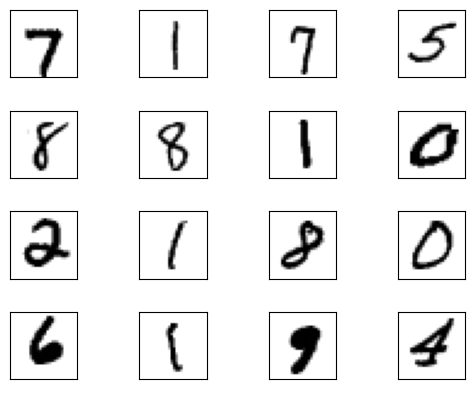

In [20]:
# Define a training data loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                     transform=transforms.Compose([
                          transforms.ToTensor(),    # convert the image to a tensor
                          transforms.Normalize((0.1307,), (0.3081,)) # normalize the image
                        ])),
    batch_size=64, shuffle=True)

# Define a test data loader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))
                        ])),
    batch_size=1000, shuffle=True)

# Define a function to plot the images
def plot_images(images, labels):
    fig, axes = plt.subplots(4, 4)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        ax.set(xticks=[], yticks=[], xlabel=int(labels[i]))
        # Make a white background for the text
        ax.xaxis.label.set_color('white')
        # Increase the vertical distance between the subplots:
        fig.subplots_adjust(hspace=0.5)
    plt.show()


# Plot a few of the MNIST images with their labels:
images, labels = next(iter(train_loader))
plot_images(images, labels)


In [21]:
# Define a function to train the model:

def train(model, device, train_loader, optimizer, epoch):
    model.train() # set the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # send the data to the device
        optimizer.zero_grad() # zero the gradients
        output = model(data) # forward pass
        loss = F.nll_loss(output, target) # calculate the loss
        loss.backward() # backward pass
        optimizer.step() # update the weights

        # Print the training loss
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Define a function to test the model
def test(model, device, test_loader):
    model.eval() # set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad(): # don't calculate the gradients
        for data, target in test_loader:
            data, target = data.to(device), target.to(device) # send the data to the device
            output = model(data) # forward pass
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up the batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability

            # Check if the prediction is correct
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate the average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

# Run the training:

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the MLP class
model = MLP(input_size=784, hidden_size=512, output_size=10).to(device)

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Train the model for 5 epochs
for epoch in range(5):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


Train Epoch: 0 [0/60000 (0%)]	Loss: -0.100184
Train Epoch: 0 [6400/60000 (11%)]	Loss: -0.110673
Train Epoch: 0 [12800/60000 (21%)]	Loss: -0.127690
Train Epoch: 0 [19200/60000 (32%)]	Loss: -0.190593
Train Epoch: 0 [25600/60000 (43%)]	Loss: -0.293359
Train Epoch: 0 [32000/60000 (53%)]	Loss: -0.398151
Train Epoch: 0 [38400/60000 (64%)]	Loss: -0.585288
Train Epoch: 0 [44800/60000 (75%)]	Loss: -0.545190
Train Epoch: 0 [51200/60000 (85%)]	Loss: -0.658800
Train Epoch: 0 [57600/60000 (96%)]	Loss: -0.821838
Test set: Average loss: -0.7545, Accuracy: 8181/10000 (82%)
Train Epoch: 1 [0/60000 (0%)]	Loss: -0.665674
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.790740
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.815543
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.754220
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.756938
Train Epoch: 1 [32000/60000 (53%)]	Loss: -0.779054
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.834507
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.757352
Train Epoch: 1 [51200/60000 (85%)]

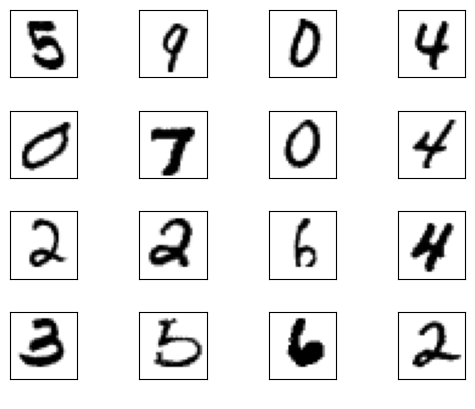

Predicted labels: [3, 9, 0, 4, 0, 7, 0, 4, 2, 2, 6, 4, 3, 0, 6, 2]
Actual labels:    [5, 9, 0, 4, 0, 7, 0, 4, 2, 2, 6, 4, 3, 5, 6, 2]


In [22]:
# We can now use the model to make predictions on the test set:

# get the first batch of test images
images, labels = next(iter(test_loader))

# plot the images
plot_images(images, labels)

# get the model predictions
preds = model(images.to(device))

# get the index of the max log-probability
preds = preds.argmax(dim=1, keepdim=True)

# print the predictions

predicted_labels_list = preds.squeeze().tolist() 
print('Predicted labels:', predicted_labels_list[:16])

# print the actual labels
print('Actual labels:   ', labels[:16].tolist())